In [ ]:
# kakao open api 사용해서 이미지 검색 코드 구현

In [1]:
import urllib
# from urllib import request
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
api_key = "b3f652be627cdb1dcdcaa6581ad69722"

url = "https://dapi.kakao.com/v2/search/image"

headers = {
    "Authorization": f"KakaoAK {api_key}"
}
params = {
    "query": "봄",
    "size": 80,
    "page": 1,
    "sort": "accuracy"
}

response = requests.get(url, params=params, headers=headers)
rescode = response.status_code # 응답 코드 읽기
if(rescode==200): # 200 : 정상응답
    image_dict = response.json() # json 결과를 읽어서 dict로 변환
else:
    print("Error Code:" + str(rescode))

In [7]:
print( image_dict.keys() )

dict_keys(['documents', 'meta'])


In [8]:
df_images = pd.DataFrame(image_dict['documents'])
df_images.head()

,collection,datetime,display_sitename,doc_url,height,image_url,thumbnail_url,width
0,cafe,2021-04-06T15:48:07.000+09:00,Daum카페,https://cafe.daum.net/hoogun/JuFf/32,200,https://search2.kakaocdn.net/argon/0x200_85_hr...,https://search1.kakaocdn.net/argon/130x130_85_...,290
1,etc,2020-03-23T10:30:54.000+09:00,,http://www.viva100.com/main/view.php?key=20200...,295,http://www.viva100.com/mnt/images/file/2020y/0...,https://search2.kakaocdn.net/argon/130x130_85_...,720
2,etc,2018-03-17T08:02:54.000+09:00,게티이미지,http://www.gettyimagesbank.com/view/봄-사진-꽃-매화꽃...,333,http://imagescdn.gettyimagesbank.com/500/20180...,https://search2.kakaocdn.net/argon/130x130_85_...,500
3,blog,2024-03-22T11:58:22.000+09:00,티스토리,https://duck-one.tistory.com/11,427,https://blog.kakaocdn.net/dn/vzb2X/btsF00xQD9z...,https://search4.kakaocdn.net/argon/130x130_85_...,640
4,cafe,2020-03-06T05:33:04.000+09:00,Daum카페,https://cafe.daum.net/onlyonemt/NYXn/2604,200,https://search2.kakaocdn.net/argon/0x200_85_hr...,https://search3.kakaocdn.net/argon/130x130_85_...,267


https://search2.kakaocdn.net/argon/0x200_85_hr/CWK57SWdyD1


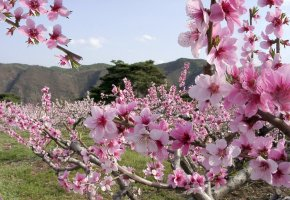

In [14]:
# 검색한 이미지를 화면에 표시하고 파일로 저장

from PIL import Image # 이미지 처리 모듈
from io import BytesIO # 메모리의 데이터를 이미지 파일처럼 처리하는 모듈

image_url = df_images["image_url"][0] # 1행의 image_url 컬럼 데이터 읽기
print(image_url)

resp = requests.get(image_url)
img_data = BytesIO(resp.content) # 메모리의 이미지 데이터를 파일 형식으로 변환
img = Image.open(img_data) # 이미지 만들기
img


In [15]:
img.save('spring.png')